# Aula 12. Pandas
<img  src='img/pandas1.jpeg' width='300' height='300' />

Pandas é uma das bibliotecas mais utilizadas em Python para manipulação e análise de dados. Esta biblioteca é de código aberto, escrita em Numpy e oferece estruturas e operações para manipulação de tabelas numéricas e séries temporais.

Os principais destaques são:
- Possui dois tipos de objetos `pandas.core.frame.DataFrame` e `pandas.core.series.Series` com indexação integrada;
- Facilita a leitura, escrita e modificação de arquivos com diferentes formatos, entre os quais se destaca .csv, .txt, .xlsx, SQL, HDF5 (Hierarchical Data Format version 5) dentre outros;
- Permite tabelas com diferentes niveis de indexação;
- Permite agrupamento de dados por categorias;
- Realiza mesclagem e junção de conjuntos de dados com alto desempenho;
- Altamente otimizado com códigos escritos em Cython e C;
- Pandas é amplamente utilizado em ambientes acadêmicos e comerciais, incluindo finanças, neurociência, economia, estatística, publicidade, análise da web e muito mais.
---
 
  <font size="5"> Os tópicos que vamos abordar nesta série de conversas são:</font>

- [X] Instalação de pandas;
- [x] Importando pandas;
- [x] Series;
- [x] DataFrame e manipulação;
 - [X] Criação de DataFrame;
 - [X] Extraindo informação por colunas. CUIDADO COM NOTAÇÃO SQL;
 - [X] Extraindo utilizando função loc;
 - [X] Extraindo utilizando função iloc;
 - [X] Adicionando novas colunas;
 - [X] Adicionando novas filas (função append);
 - [X] Eliminando colunas ou filas.
- [X] Operadores de comparação e seleção condicional;
- [X] Dados ausentes;
 - [X] Dropna
 - [X] filna
 - [X] replace
- [X] Groupby, aggregate e apply
- [ ] Juntando diffenrentes `DataFrame` 
 - [ ] `concat`
 - [ ] `merge`
 - [ ] `join`
- [ ] Operações
 - [ ] unique
 - [ ] nunique
 - [ ] value_counts
 - [ ] del ( )
 - [ ] columns
 - [ ] index
 - [ ] sort_values
 - [ ] pivol
- [ ] Importando e exportando dados.
 - [ ] csv
 - [ ] excell
 - [ ] html
- Aplicação
---
<font size="5"> Recomento visitar o site oficial do projeto [Pandas](https://pandas.pydata.org/) para conhecer mais um pouco desta biblioteca.</font>

## Intalação do pandas

Para instalar pandas no nosso computador podemos utilizar o condas ou o pip.
```python
conda install pandas
pip install pandas
```

## importando pandas e numpy

In [1]:
import pandas as pd
import numpy as np

## Series
O conceito principal de uma [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) em Pandas e trabalhar com vetores a partir do indice ou labels. A sintaxe para definir uma Series é:
```python
 pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

In [2]:
# Definindo algumas variaveis que vamos utilizar
valores  = np.random.randn(1, 10).reshape(10,)
index_row = "A B C D E F G H I J".split(" ")
d = {key: value for key, value in zip(index_row, valores)}

In [3]:
# Criando uma Series passando somente os valores
pd.Series(valores)

0    0.406887
1    2.238153
2   -0.567062
3   -0.488545
4   -0.128981
5    0.035170
6    1.556229
7   -0.182374
8    0.524374
9   -0.004501
dtype: float64

In [4]:
# Criando uma Series passando data e index
pd.Series(data=valores, index=index_row)
# Como se pode observar o índex agora são os valores A B C D E F G H I J

A    0.406887
B    2.238153
C   -0.567062
D   -0.488545
E   -0.128981
F    0.035170
G    1.556229
H   -0.182374
I    0.524374
J   -0.004501
dtype: float64

In [5]:
# Observemos que pomodes criar uma Series passando qualquer tipo de dados
pd.Series(index=valores, data=index_row)
# Agora os index são floats

 0.406887    A
 2.238153    B
-0.567062    C
-0.488545    D
-0.128981    E
 0.035170    F
 1.556229    G
-0.182374    H
 0.524374    I
-0.004501    J
dtype: object

In [6]:
# Observemos que uma Series se comporta de forma semelhante ao dicionário dado que ela trabalhar com chave: valor,
# portanto podemos criar uma Seires passando um dicionário
pd.Series(d)

A    0.406887
B    2.238153
C   -0.567062
D   -0.488545
E   -0.128981
F    0.035170
G    1.556229
H   -0.182374
I    0.524374
J   -0.004501
dtype: float64

Mas qual é a vantagem de utilizar uma Series em relação ao arrays?

In [7]:
series_1 = pd.Series(data=[5, 10, 20, 30, 8], index="A B C D J".split(" "))
series_2 = pd.Series(data=[20, 15, 15, 5, 25], index="A B K D C".split(" "))
print(series_1)
print(series_2)
print(series_1 + series_2)
# Ao se realizar operações com series, as operações
# são realizadas entre os elementos que tem o mesmo índex, isso não é possível ao se trabalhar com `np.array`.

A     5
B    10
C    20
D    30
J     8
dtype: int64
A    20
B    15
K    15
D     5
C    25
dtype: int64
A    25.0
B    25.0
C    45.0
D    35.0
J     NaN
K     NaN
dtype: float64


## DataFrame e manipulação
O objeto principal de Pandas é o [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), este objeto se aproxima ao que conhecemos como planilha de excell (somente em aparência). Para definir um DataFrame utilizamos a seguinte sintaxe:
```python
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```
Neste caso os argumentos mais relevantes são `data`, `index` e `columns`, porém o único argumento obrigatório é o `data`.

### Criação de DataFrame

In [8]:
# Criando dados para utilizar no DataFrame
data = np.arange(1, 17).reshape((4,4))
index = "Row_1 Row_2 Row_3 Row_4".split(" ")
col = "Col_1 Col_2 Col_3 Col_4".split(" ")

In [12]:
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [13]:
# Definindo um DataFrame passando data
pd.DataFrame(data)

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16


In [14]:
# Definindo um DataFrame passando data e index
pd.DataFrame(data, index)

,0,1,2,3
Row_1,1,2,3,4
Row_2,5,6,7,8
Row_3,9,10,11,12
Row_4,13,14,15,16


In [15]:
# Definindo um DataFrame passando data, index e columns
data_frame = pd.DataFrame(data, index, col)
data_frame

,Col_1,Col_2,Col_3,Col_4
Row_1,1,2,3,4
Row_2,5,6,7,8
Row_3,9,10,11,12
Row_4,13,14,15,16


### Extraindo informação por colunas. *CUIDADO COM NOTAÇÃO SQL*

In [16]:
# Extraindo informação da columna Col_4
data_frame["Col_4"]

Row_1     4
Row_2     8
Row_3    12
Row_4    16
Name: Col_4, dtype: int64

In [17]:
# Podemos utilizar a notação de ponto e o nome da columna, porém esta forma não é recomendada
data_frame.Col_3

Row_1     3
Row_2     7
Row_3    11
Row_4    15
Name: Col_3, dtype: int64

### Extraindo utilizando função loc
A propriedade [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) permite obter os dados de um DataFrame a partir dos labels das filas e das coluna. A sintaxe para aplicar esta propriedade é:
```python
DataFrame.loc[]
```

In [18]:
# Podemos utilizar a função loc para extrair informação utilizando o índice da fila e o nome da coluna
data_frame.loc["Row_1", "Col_1"]

1

In [19]:
# Para extrair diferentes colunas ou fila passamos uma lista com os nomes das colunas e filas
data_frame.loc[["Row_1", "Row_4"], ["Col_1", "Col_4"]]

,Col_1,Col_4
Row_1,1,4
Row_4,13,16


In [20]:
# Também podemos utilizar a função loc para extrair filas
data_frame.loc["Row_3"]

Col_1     9
Col_2    10
Col_3    11
Col_4    12
Name: Row_3, dtype: int64

### Extraindo utilizando função iloc
Existe outra forma de extrair os valores de um DataFrame utilizando a notação aprendida em Numpy, para isso utilizamos a propriedade [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html):
```python
DataFrame.iloc[]
```

In [21]:
data_frame.iloc[0, 0]

1

In [22]:
data_frame.iloc[ [0, -1], [0, -1]]

,Col_1,Col_4
Row_1,1,4
Row_4,13,16


In [23]:
data_frame.iloc[2]

Col_1     9
Col_2    10
Col_3    11
Col_4    12
Name: Row_3, dtype: int64

In [24]:
data_frame.iloc[2:]

,Col_1,Col_2,Col_3,Col_4
Row_3,9,10,11,12
Row_4,13,14,15,16


### Adicionando novas colunas

In [25]:
data_frame["Col_nova"] = data_frame.iloc[:, -1] + data_frame.iloc[:, 0]
data_frame

,Col_1,Col_2,Col_3,Col_4,Col_nova
Row_1,1,2,3,4,5
Row_2,5,6,7,8,13
Row_3,9,10,11,12,21
Row_4,13,14,15,16,29


In [26]:
data_frame["Col_nova_2"]  = 2
data_frame

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5,2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2


In [27]:
data_frame

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5,2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2


### Adicionando novas filas (função append)
Para adicionar uma nova fila utilizamos a função [append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), essa função adiciona uma nova (ou novas) fila(s) no final do DataFrame. A sintaxe utilizada para isso é:
```python
DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)
```

In [29]:
np.array([[1,2,3,4]])

array([[1, 2, 3, 4]])

In [30]:
data_frame2 = pd.DataFrame([[1,2,3,4]], columns=col)
data_frame.append(data_frame2)

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5.0,2.0
Row_2,5,6,7,8,13.0,2.0
Row_3,9,10,11,12,21.0,2.0
Row_4,13,14,15,16,29.0,2.0
0,1,2,3,4,NaN,NaN


In [31]:
data_frame.append(data_frame*10)

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5,2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2
Row_1,10,20,30,40,50,20
Row_2,50,60,70,80,130,20
Row_3,90,100,110,120,210,20
Row_4,130,140,150,160,290,20


### Eliminando colunas ou filas
Para eliminar colunas ou filas de um DataFrame utilizamos a função [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Neste caso se deve passar o indice da fila que será eliminada ou o label da coluna. Além disso, deve-se especificar o `axis` o qual é 0 para filas e 1 para columnas. A sintaxe utilizada é:

```python
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```

In [32]:
data_frame

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5,2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2


In [33]:
# Eliminando a primeira fila
data_frame.drop("Row_1", axis=0)

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2


In [34]:
# Eliminando varias filas 
data_frame.drop(["Row_1", "Row_3"], axis=0)

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_2,5,6,7,8,13,2
Row_4,13,14,15,16,29,2


In [35]:
# Eliminando a primeira coluna
data_frame.drop("Col_1", axis=1)

,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,2,3,4,5,2
Row_2,6,7,8,13,2
Row_3,10,11,12,21,2
Row_4,14,15,16,29,2


In [37]:
data_frame
# Observemos que o DataFrame original não foi modificado

,Col_1,Col_2,Col_3,Col_4,Col_nova,Col_nova_2
Row_1,1,2,3,4,5,2
Row_2,5,6,7,8,13,2
Row_3,9,10,11,12,21,2
Row_4,13,14,15,16,29,2


In [38]:
# Eliminando a varias colunas e modificando o DataFrame original
data_frame.drop(["Col_1", "Col_4"], axis=1, inplace=True)

In [39]:
data_frame
# é interessante o fato de não modificar o data_frame original?

,Col_2,Col_3,Col_nova,Col_nova_2
Row_1,2,3,5,2
Row_2,6,7,13,2
Row_3,10,11,21,2
Row_4,14,15,29,2


## Operadores de comparação e seleção condicional
Da mesma forma que é possível aplicar operadores de comparação em arrays, com pandas podemos aplicar os mesmos operadores.

In [40]:
# Criando dados para trabalhar
np.random.seed(100)
data2 = np.random.randint(-10, 10, (5,5))
col2 = [f"Col_{i}" for i in range(1, 6)]
row2 = [f"Row_{i}" for i in range(1, 6)]
data_frame2 = pd.DataFrame(data2, row2, col2)
data_frame2 

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4
Row_3,-8,7,6,5,-6
Row_4,1,6,-1,-8,2
Row_5,-6,-9,3,9,-6


In [41]:
data_frame2 > 0

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,False,False,False,True,True
Row_2,False,False,False,False,True
Row_3,False,True,True,True,False
Row_4,True,True,False,False,True
Row_5,False,False,True,True,False


In [42]:
# Podemos atribuir esse teste de comparação a uma variável e utiliza-o para realizar seleção
comp = data_frame2 > 0
data_frame2[comp] 


,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4
Row_3,-8,7,6,5,-6
Row_4,1,6,-1,-8,2
Row_5,-6,-9,3,9,-6


In [44]:
# Realizar de forma direta essa comparação é mais interessante
data_frame2[data_frame2 > 0] 
data_frame2

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4
Row_3,-8,7,6,5,-6
Row_4,1,6,-1,-8,2
Row_5,-6,-9,3,9,-6


In [45]:
# Aplicando uma comparação numa serie
comp = data_frame2["Col_5"] > 0
data_frame2[comp]["Col_1"]
data_frame2

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4
Row_3,-8,7,6,5,-6
Row_4,1,6,-1,-8,2
Row_5,-6,-9,3,9,-6


In [46]:
# Aplicando comparações multiples
comp1 = data_frame2["Col_5"] >= 2 #(Row_1, Row_2 e Row_4)
comp2 = data_frame2["Col_3"] < -1 # (Row_1, Row_2)
data_frame2[comp2 & comp1]

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4


In [47]:
# As tres linhas anteriores são equivalentes a:
data_frame2[(data_frame2["Col_5"] >= 2) & (data_frame2["Col_3"] < -1)]

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4


In [48]:
data_frame2

,Col_1,Col_2,Col_3,Col_4,Col_5
Row_1,-2,-7,-3,5,6
Row_2,0,-8,-8,-8,4
Row_3,-8,7,6,5,-6
Row_4,1,6,-1,-8,2
Row_5,-6,-9,3,9,-6


## Dados ausentes
Quando trabalhamos com dados provenientes de fontes externas (como base de dados, dados de sensores, etc), pode acontecer que existam dados com valores "inapropriados" ou valores ausentes. Nesse caso a biblioteca Pandas ajuda a processar esses valores.

Cabe destacar que o conceito de dado "inapropriado" varia de cenário para cenário e aforma de tratar esses dados pode varia. Porém, Pandas possui uma diversa variedade de funções e metódos que podem ser utilizados para essa finalidade.

Recomendo a leitura de [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html). Nesta leitura a empresa desenvolvedora da biblioteca Pandas apresenta varias formas de processar dados ausentes.


In [49]:
# Criando data frame com valores nan
np.random.seed(100)
n = 10
data2 = np.random.randint(-10, 10, (n, n)).astype(object)
col2 = [f"Col_{i}" for i in range(1, n + 1)]
row2 = [f"Row_{i}" for i in range(1, n + 1)]
for r in range(n):
    for c in range(n):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_nan = pd.DataFrame(data2, row2, col2)
data_frame_nan

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,-7,NaN,5,6,0,-8,-8,-8,4
Row_2,-8,7,6,NaN,-6,1,6,-1,-8,NaN
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5
Row_4,NaN,NaN,NaN,6,-8,NaN,9,-8,4,7
Row_5,6,5,-3,3,NaN,2,8,-10,-8,0
Row_6,7,NaN,3,0,NaN,NaN,8,-2,9,4
Row_7,-10,NaN,2,0,NaN,-4,NaN,5,0,NaN
Row_8,-7,NaN,6,1,-6,-5,-3,-4,-8,0
Row_9,8,NaN,2,-9,-4,0,-10,-8,9,-6
Row_10,8,NaN,NaN,-1,NaN,6,-4,-5,NaN,NaN


### Dropna

Para excluir valores faltantes `NaN` utilizamos a função [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Os argumentos necessarios para esta função são:

```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

In [50]:
# Elimiando os valores NaN, observemos que o resultado é somente Row_3
# Neste caso definimos axis=0, o que indica que caso alguma fila tenha pelo menos um Nan, a fila será excluida
data_frame_nan.dropna(axis=0)

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5


In [51]:
# Elimiando os valores NaN, observemos que o resultado é somente Col_8
# Neste caso definimos axis=0, o que indica que caso alguma fila tenha pelo menos um Nan, a fila será excluida
data_frame_nan.dropna(axis=1)

,Col_8
Row_1,-8
Row_2,-1
Row_3,-3
Row_4,-8
Row_5,-10
Row_6,-2
Row_7,5
Row_8,-4
Row_9,-8
Row_10,-5


In [52]:
# Também podemos definir a quantidade de valores no Nan que vamos aceitar. Por tanto se queremos aceitar
# pelo menos um NaN devemos de passar `thresh=9`
data_frame_nan.dropna(axis=1,thresh=9)

,Col_1,Col_4,Col_7,Col_8,Col_9
Row_1,-2,5,-8,-8,-8
Row_2,-8,NaN,6,-1,-8
Row_3,-6,9,-7,-3,7
Row_4,NaN,6,9,-8,4
Row_5,6,3,8,-10,-8
Row_6,7,0,8,-2,9
Row_7,-10,0,NaN,5,0
Row_8,-7,1,-3,-4,-8
Row_9,8,-9,-10,-8,9
Row_10,8,-1,-4,-5,NaN


In [53]:
# Observemos que a tabela original não foi modificada.
data_frame_nan

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,-7,NaN,5,6,0,-8,-8,-8,4
Row_2,-8,7,6,NaN,-6,1,6,-1,-8,NaN
Row_3,-6,-9,3,9,-6,-6,-7,-3,7,5
Row_4,NaN,NaN,NaN,6,-8,NaN,9,-8,4,7
Row_5,6,5,-3,3,NaN,2,8,-10,-8,0
Row_6,7,NaN,3,0,NaN,NaN,8,-2,9,4
Row_7,-10,NaN,2,0,NaN,-4,NaN,5,0,NaN
Row_8,-7,NaN,6,1,-6,-5,-3,-4,-8,0
Row_9,8,NaN,2,-9,-4,0,-10,-8,9,-6
Row_10,8,NaN,NaN,-1,NaN,6,-4,-5,NaN,NaN


In [54]:
# Se queremos modificar o arquivo original devemos passar `inplace=True`
data_frame_nan.dropna(axis=1,thresh=7, inplace=True)
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


### fillna
Outra forma de processar os dados faltantes é utilizando a função [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) a qual permite substituir o valor faltante por outro valor.
```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```

In [55]:
# Criando DataFrame com valores nan
np.random.seed(100)
n = 10
data2 = np.random.randint(25, 37, (n, n)).astype(object)
col2 = [f"Day_{i}" for i in range(1, n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(n):
    for c in range(n):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_fillna = pd.DataFrame(data2, row2, col2)
data_frame_fillna

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10
Time_1,33,33,NaN,32,32,25,35,29,NaN,30
Time_2,27,27,27,26,NaN,33,29,36,35,NaN
Time_3,36,NaN,NaN,27,NaN,29,26,30,28,29
Time_4,NaN,36,36,28,32,NaN,26,NaN,32,NaN
Time_5,25,NaN,34,34,28,27,NaN,36,33,NaN
Time_6,NaN,32,31,NaN,25,33,27,30,35,26
Time_7,33,35,26,30,29,27,33,36,36,NaN
Time_8,30,25,34,35,28,31,28,29,35,32
Time_9,NaN,28,34,NaN,29,NaN,29,30,32,31
Time_10,31,NaN,35,29,27,32,26,35,31,35


In [56]:
data_frame_fillna.fillna(value="VALOR ERRADO")

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10
Time_1,33,33,VALOR ERRADO,32,32,25,35,29,VALOR ERRADO,30
Time_2,27,27,27,26,VALOR ERRADO,33,29,36,35,VALOR ERRADO
Time_3,36,VALOR ERRADO,VALOR ERRADO,27,VALOR ERRADO,29,26,30,28,29
Time_4,VALOR ERRADO,36,36,28,32,VALOR ERRADO,26,VALOR ERRADO,32,VALOR ERRADO
Time_5,25,VALOR ERRADO,34,34,28,27,VALOR ERRADO,36,33,VALOR ERRADO
Time_6,VALOR ERRADO,32,31,VALOR ERRADO,25,33,27,30,35,26
Time_7,33,35,26,30,29,27,33,36,36,VALOR ERRADO
Time_8,30,25,34,35,28,31,28,29,35,32
Time_9,VALOR ERRADO,28,34,VALOR ERRADO,29,VALOR ERRADO,29,30,32,31
Time_10,31,VALOR ERRADO,35,29,27,32,26,35,31,35


In [57]:
# Caso queiramos preencher o valor faltante pelo valor anterior podemos realizar isso aplicando o `method="ffill"`
# Criando data frame com valores nan
np.random.seed(100)
n = 1440 # Equivalente a coleta de pontos cada 60 segundos por 24 h
r_n = 5
data2 = np.random.randint(27, 33, (n, r_n)).astype(object)
col2 = [f"Reactor_{i}" for i in range(1, r_n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(data2.shape[0]):
    for c in range(data2.shape[1]):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
data_frame_fillna = pd.DataFrame(data2, row2, col2)
data_frame_fillna.info()
data_frame_fillna.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, Time_1 to Time_1440
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reactor_1  1094 non-null   object
 1   Reactor_2  1086 non-null   object
 2   Reactor_3  1096 non-null   object
 3   Reactor_4  1066 non-null   object
 4   Reactor_5  1079 non-null   object
dtypes: object(5)
memory usage: 67.5+ KB


,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
count,1094,1086,1096,1066,1079
unique,6,6,6,6,6
top,30,29,28,27,29
freq,195,194,208,194,206


In [58]:
data_frame_fillna

,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
Time_1,27,27,30,27,29
Time_2,31,29,32,29,NaN
Time_3,29,NaN,27,27,31
Time_4,NaN,NaN,29,27,30
Time_5,28,32,29,30,31
...,...,...,...,...,...
Time_1436,32,NaN,NaN,29,31
Time_1437,30,NaN,32,32,28
Time_1438,29,30,29,31,31
Time_1439,NaN,27,32,28,31


In [59]:
data_frame_fillna.fillna(method="ffill", inplace=True)

In [60]:
data_frame_fillna

,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
Time_1,27,27,30,27,29
Time_2,31,29,32,29,29
Time_3,29,29,27,27,31
Time_4,29,29,29,27,30
Time_5,28,32,29,30,31
...,...,...,...,...,...
Time_1436,32,28,32,29,31
Time_1437,30,28,32,32,28
Time_1438,29,30,29,31,31
Time_1439,29,27,32,28,31


In [61]:
data_frame_fillna.info()
data_frame_fillna.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, Time_1 to Time_1440
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Reactor_1  1440 non-null   int64
 1   Reactor_2  1440 non-null   int64
 2   Reactor_3  1440 non-null   int64
 3   Reactor_4  1440 non-null   int64
 4   Reactor_5  1440 non-null   int64
dtypes: int64(5)
memory usage: 67.5+ KB


,Reactor_1,Reactor_2,Reactor_3,Reactor_4,Reactor_5
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,29.471528,29.490972,29.554167,29.402778,29.537500
std,1.671997,1.666804,1.698991,1.690506,1.698623
min,27.000000,27.000000,27.000000,27.000000,27.000000
25%,28.000000,28.000000,28.000000,28.000000,28.000000
50%,29.000000,29.000000,29.500000,29.000000,30.000000
75%,31.000000,31.000000,31.000000,31.000000,31.000000
max,32.000000,32.000000,32.000000,32.000000,32.000000


### replace
Uma das alternativas mais adequadas para trabalhar com valores ausentes ou inadequados é utilizando a função [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). Esta função trabalha de forma semelhante a `dropna` e `filna` porém agora podemos indicar qual ou quais valores queremos substituir. A sintaxe para o funcionamento deste método é:

```python
DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
```

In [64]:
# Vamos contiuar com data_frame_nan
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


In [66]:
# Observemos que temos varios valores Nan e podemos substituir esses valores por outro valor.
data_frame_nan.replace(to_replace=np.nan, value=10)

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,10,5,0,-8,-8,-8,4
Row_2,-8,6,10,1,6,-1,-8,10
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,10,10,6,10,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,10,8,-2,9,4
Row_7,-10,2,0,-4,10,5,0,10
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,10,-1,6,-4,-5,10,10


In [67]:
# Podemos passar uma lista de valores para ser subtituido
data_frame_nan.replace(to_replace=[np.nan, 8], value=10)

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,10,5,0,-8,-8,-8,4
Row_2,-8,6,10,1,6,-1,-8,10
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,10,10,6,10,9,-8,4,7
Row_5,6,-3,3,2,10,-10,-8,0
Row_6,7,3,0,10,10,-2,9,4
Row_7,-10,2,0,-4,10,5,0,10
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,10,2,-9,0,-10,-8,9,-6
Row_10,10,10,-1,6,-4,-5,10,10


In [68]:
# E também uma lista de valores para substuir
data_frame_nan.replace(to_replace=[np.nan, 8], value=[100, 80])

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,100,5,0,-8,-8,-8,4
Row_2,-8,6,100,1,6,-1,-8,100
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,100,100,6,100,9,-8,4,7
Row_5,6,-3,3,2,80,-10,-8,0
Row_6,7,3,0,100,80,-2,9,4
Row_7,-10,2,0,-4,100,5,0,100
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,80,2,-9,0,-10,-8,9,-6
Row_10,80,100,-1,6,-4,-5,100,100


In [69]:
# Voltando ao exemplo do sensor de temperatura
np.random.seed(100)
n = 1440 # Equivalente a coleta de pontos cada 60 segundos por 24 h
r_n = 3
err = [10, 15, 20, 40, 35]
data2 = np.random.uniform(27, 33, (n, r_n)).astype(object)
col2 = [f"Reactor_{i}" for i in range(1, r_n + 1)]
row2 = [f"Time_{i}" for i in range(1, n + 1)]
for r in range(data2.shape[0]):
    for c in range(data2.shape[1]):
        if np.random.random() < 0.25:
            data2[r, c] = np.nan
        elif np.random.random() < 0.1:
            data2[r, c] = np.random.choice(err)
data_frame_replace = pd.DataFrame(data2, row2, col2)


In [70]:
data_frame_replace

,Reactor_1,Reactor_2,Reactor_3
Time_1,30.2604,28.6702,29.5471
Time_2,32.0687,27.0283,15
Time_3,31.0245,31.9551,27.8202
Time_4,30.4506,32.3479,28.2552
Time_5,28.112,NaN,28.3182
...,...,...,...
Time_1436,32.6975,28.8009,31.803
Time_1437,NaN,27.9359,31.8323
Time_1438,30.1258,30.3247,29.1884
Time_1439,NaN,30.6762,28.3808


<IPython.core.display.Javascript object>


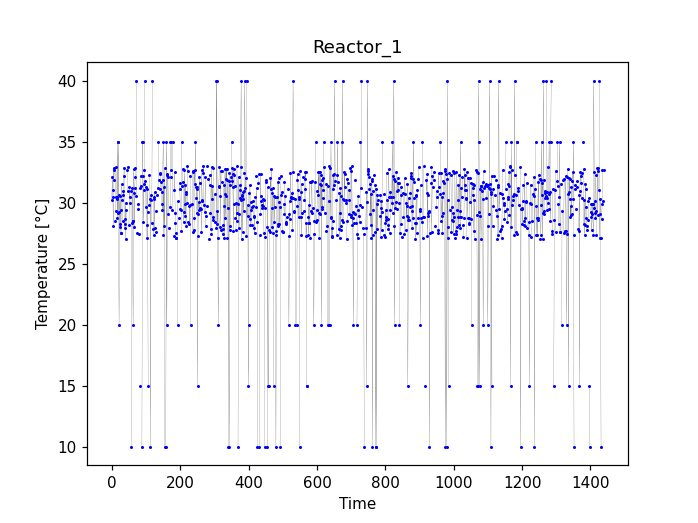

<IPython.core.display.Javascript object>


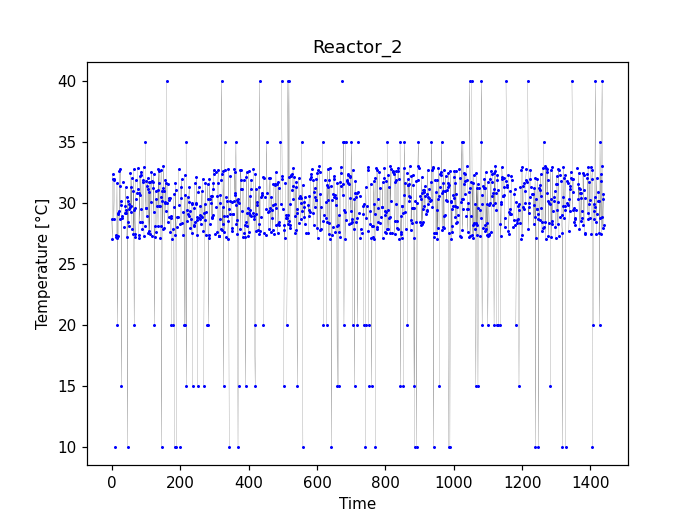

<IPython.core.display.Javascript object>


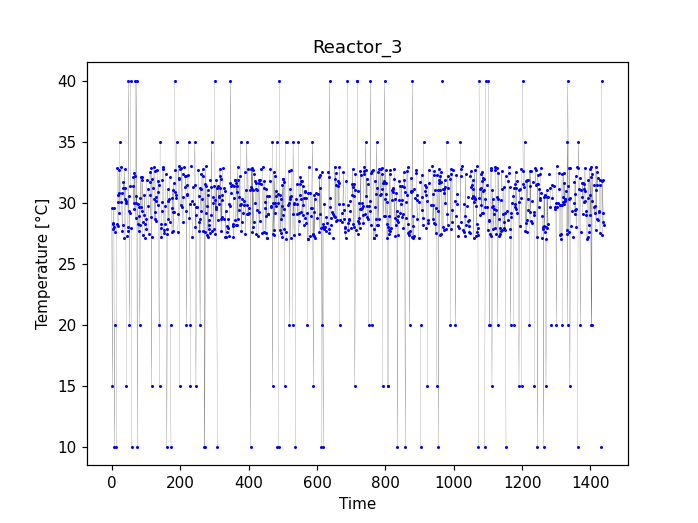

In [71]:
import matplotlib.pyplot as plt
%matplotlib nbagg
for react in data_frame_replace.columns:
    fig, ax = plt.subplots()
    ax.plot(data_frame_replace[react].values,
             ls="-",
             c='black',
             marker="o", 
             markersize=1.0,
             markeredgecolor='blue',
             lw=0.1)
    ax.set_xlabel("Time")
    ax.set_ylabel("Temperature [°C]")
    ax.set_title(react)

In [ ]:
# Realizando a modificação e alterando a tabela original
data_frame_replace.replace(to_replace=[40, 35, 20, 15, 10, np.nan], value=data_frame_replace.mean().mean(), inplace=True)

## Groupby, aggregate e apply
Quando trabalhamos com dados qualitativos nominais pode ser necessário realizar agrupamentos e aplicar funções neste grupo de dados para conseguir entender melhor nosso sistema. Panda oferece uma serie de funções que ajudam a realizar isso. Cabe destacar que o potencial de Pandas está no uso em conjunto destas funções e outras.

---

A função [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) é umas das função **mais importantes** da biblioteca Pandas devido a que permite realizar o agrupamento de grande quantidade de dados e aplicar funções sobre esses valores agrupados de forma rápida. Para aplicar essa função utilizamos a seguinte sintaxe:
```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)
```

---

A função [`aggregate`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) permite aplicar uma (ou mais funções) sobre uma(s) coluna(s) ou fila(s).

**Observações**:
- Podem ser aplicadas funções `built-in function`, `lambda functions` ou funções criadas com a palavra reservada `def`;
- Podem ser aplicadas diferentes quantidades e tipos de funções para diferentes colunas ou filas do mesmo DataFrame;
- Ao momento de passar a funções não é necessário realizar a chamada da função.

A sintaxe utilizada para aplicar esta função é:
```python
DataFrame.aggregate(func=None, axis=0, *args, **kwargs)
```
***Recomendo ler a [documentação da função aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) para conseguir entender melhor seu funcionamento***.

---

A função [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) permite aplicar **UMA FUNÇÃO** sobre uma Series ou um DataFrame, especificando ou eixo onde dever ser aplicada a função.

**Observações**:
- Podem ser aplicadas funções `built-in function`,  `lambda functions` ou funções criadas com a palavra reservada `def`;
- Ao momento de passar a funções não é necessário realizar a chamada da função.

A sintaxe para utilizar esta função é:

```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
```
***Recomendo ler a [documentação da função apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) para conseguir entender melhor seu funcionamento***.









In [72]:
# Para entender o funcionamento da função groupby vamos a criar uma matrix de dados
n = 1500
np.random.seed(100)
empresas = [f"Empresa {np.random.randint(1, 51)}" for _ in range(n)]
valor_investido = [np.random.uniform(500, 3500) for _ in range(n)]
retorno = [np.random.uniform(2000, 5000) for _ in range(n)]
transferencias = [np.random.randint(50, 150) for _ in range(n)]
matriz = np.c_[valor_investido, retorno, transferencias]
colum = "Valor investido ($R), Retorno ($R), Transferencias".split(", ")
#-----------------------------------------------------------------------
# Criação do DataFrame
data_frame_groupby = pd.DataFrame(data=matriz, columns=colum )
data_frame_groupby["Lucro ($)"] = data_frame_groupby["Retorno ($R)"] - data_frame_groupby["Valor investido ($R)"]
data_frame_groupby["Empresas"] = empresas
data_frame_groupby

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
0,2395.146139,2267.914842,147.0,-127.231297,Empresa 9
1,573.809911,4686.133772,138.0,4112.323860,Empresa 25
2,1595.693889,2063.509230,66.0,467.815341,Empresa 4
3,950.708543,3344.221121,114.0,2393.512577,Empresa 40
4,1867.941222,3312.663318,116.0,1444.722095,Empresa 24
...,...,...,...,...,...
1495,2485.341177,2692.370879,62.0,207.029702,Empresa 15
1496,840.284504,2700.582463,93.0,1860.297958,Empresa 37
1497,2250.217715,4771.450109,73.0,2521.232394,Empresa 46
1498,2396.891151,4391.564187,98.0,1994.673036,Empresa 15


In [73]:
data_frame_groupby["Empresas"].unique()

array(['Empresa 9', 'Empresa 25', 'Empresa 4', 'Empresa 40', 'Empresa 24',
       'Empresa 16', 'Empresa 49', 'Empresa 11', 'Empresa 31',
       'Empresa 35', 'Empresa 3', 'Empresa 15', 'Empresa 50',
       'Empresa 37', 'Empresa 44', 'Empresa 17', 'Empresa 10',
       'Empresa 30', 'Empresa 23', 'Empresa 28', 'Empresa 45',
       'Empresa 5', 'Empresa 32', 'Empresa 2', 'Empresa 14', 'Empresa 20',
       'Empresa 8', 'Empresa 48', 'Empresa 42', 'Empresa 47',
       'Empresa 46', 'Empresa 39', 'Empresa 19', 'Empresa 1',
       'Empresa 18', 'Empresa 43', 'Empresa 41', 'Empresa 13',
       'Empresa 7', 'Empresa 21', 'Empresa 6', 'Empresa 34', 'Empresa 36',
       'Empresa 22', 'Empresa 26', 'Empresa 38', 'Empresa 29',
       'Empresa 27', 'Empresa 33', 'Empresa 12'], dtype=object)

### Groupby

In [74]:
# Para entender o conceito de Groupby, vamos agrupar os dados por empresas
dfgroupby = data_frame_groupby.groupby(by="Empresas")

In [75]:
# Observemos que o retorno da função groupby é o endereço na memoria de um objeto
dfgroupby

In [76]:
# Para conseguir visualizar o DataFrame, devemos aplicar uma função sobre os valores
dfgroupby.mean()

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($)
Empresas,,,,
Empresa 1,1664.379181,3423.575079,92.466667,1759.195898
Empresa 10,2140.719171,3190.926190,100.814815,1050.207019
Empresa 11,2116.869748,3347.678176,90.678571,1230.808427
Empresa 12,1862.925647,3958.437340,91.086957,2095.511693
Empresa 13,1900.576222,3431.103574,94.969697,1530.527352
Empresa 14,1898.060800,3647.238621,88.678571,1749.177821
Empresa 15,2111.297602,3452.572584,89.243243,1341.274982
Empresa 16,1957.131902,3351.897950,92.000000,1394.766049
Empresa 17,1978.605630,3462.218560,106.028571,1483.612930


In [77]:
# Podemos utilizar o groupby para realizar agrupamento por camadas
agrupamento_empr_trans = data_frame_groupby.groupby(["Empresas", "Transferencias"]).mean()
agrupamento_empr_trans

Valor investido ($R)  Retorno ($R)    Lucro ($)
Empresas  Transferencias                                                 
Empresa 1 50.0                      949.481781   3258.569069  2309.087288
          52.0                     1150.382949   3464.347048  2313.964099
          59.0                     2718.050208   3536.096278   818.046070
          60.0                     1713.525700   3443.852804  1730.327104
          61.0                     2386.676100   2918.913180   532.237079
...                                        ...           ...          ...
Empresa 9 121.0                    1783.656084   3478.758634  1695.102549
          126.0                    1444.890047   2840.694665  1395.804618
          129.0                    1994.924685   3782.232389  1787.307704
          132.0                    2527.237143   3025.136451   497.899308
          147.0                    2395.146139   2267.914842  -127.231297

[1307 rows x 3 columns]

In [78]:
agrupamento_trans_empr = data_frame_groupby.groupby(["Transferencias", "Empresas"]).mean()
agrupamento_trans_empr

Valor investido ($R)  Retorno ($R)    Lucro ($)
Transferencias Empresas                                                   
50.0           Empresa 1             949.481781   3258.569069  2309.087288
               Empresa 12            876.443074   4658.884928  3782.441854
               Empresa 16            936.434790   3765.879569  2829.444779
               Empresa 18           1288.585806   3632.588113  2344.002307
               Empresa 38           3224.291878   2669.298845  -554.993033
...                                         ...           ...          ...
149.0          Empresa 39            649.237729   2592.643863  1943.406134
               Empresa 41           1387.985223   4014.152906  2626.167683
               Empresa 42           1901.519976   4938.360410  3036.840434
               Empresa 43           1514.334239   4598.270672  3083.936434
               Empresa 46            934.089746   3387.466042  2453.376296

[1307 rows x 3 columns]

In [79]:
# E se queremos realizar filtragem ao momento de aplicar o filtro?
agrupamento_empr_trans[(agrupamento_empr_trans["Valor investido ($R)"]>1800) & 
                        (agrupamento_empr_trans["Lucro ($)"]>1500)]

Valor investido ($R)  Retorno ($R)    Lucro ($)
Empresas   Transferencias                                                 
Empresa 1  81.0                     2135.877267   4468.780056  2332.902789
           127.0                    2668.333667   4237.318294  1568.984627
Empresa 10 57.0                     1881.921732   3735.794141  1853.872409
           74.0                     1806.401431   3749.251654  1942.850223
           85.0                     2143.842458   3921.027887  1777.185429
...                                         ...           ...          ...
Empresa 8  70.0                     2550.492525   4337.466856  1786.974330
           93.0                     2009.062947   4228.183823  2219.120876
           101.0                    1994.210798   4795.585638  2801.374839
Empresa 9  117.0                    3074.262930   4891.414999  1817.152069
           129.0                    1994.924685   3782.232389  1787.307704

[203 rows x 3 columns]

In [80]:
# Podemos utilizar algums metodos para potencializar o uso de groupby
data_frame_groupby.groupby(["Empresas"]).get_group(("Empresa 1"))

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
59,754.555607,4576.840550,128.0,3822.284944,Empresa 1
74,3342.394319,4517.216631,59.0,1174.822313,Empresa 1
106,1472.905328,4414.208565,146.0,2941.303237,Empresa 1
153,1164.984570,2313.010752,105.0,1148.026182,Empresa 1
270,1622.946167,2737.280220,113.0,1114.334053,Empresa 1
283,1603.691062,2623.841086,94.0,1020.150025,Empresa 1
343,807.412306,2149.619527,72.0,1342.207221,Empresa 1
370,637.549984,2988.202114,146.0,2350.652130,Empresa 1
393,2353.250043,3289.043032,145.0,935.792988,Empresa 1
505,2962.442465,4111.280688,106.0,1148.838223,Empresa 1


In [81]:
data_frame_groupby.groupby(["Empresas", "Transferencias"]).get_group(("Empresa 1", 52))

,Valor investido ($R),Retorno ($R),Transferencias,Lucro ($),Empresas
1484,1150.382949,3464.347048,52.0,2313.964099,Empresa 1


### aggregate

In [82]:
# podemos aplicar aggreagate para um groupby de dois niveis

# pd.set_option('display.max_rows', 10)
dfgroupby.aggregate({"Lucro ($)": [min, max, np.mean, np.std],
                     "Retorno ($R)": [min, max, np.mean, np.std],
                     "Transferencias": [min, max]})

Lucro ($)                                        Retorno ($R)  \
                    min          max         mean          std          min   
Empresas                                                                      
Empresa 1  -1029.431080  3822.284944  1759.195898  1037.584319  2149.619527   
Empresa 10 -1030.443270  3453.502875  1050.207019  1148.871827  2087.910491   
Empresa 11  -705.662450  3519.872560  1230.808427  1182.481833  2030.177115   
Empresa 12  -714.737098  4381.339656  2095.511693  1404.498163  2141.494135   
Empresa 13 -1148.533275  3866.567488  1530.527352  1247.353711  2023.691796   
Empresa 14   263.865646  3536.995386  1749.177821  1140.728316  2155.363780   
Empresa 15  -728.587438  3619.623496  1341.274982  1016.592325  2092.543773   
Empresa 16  -548.482080  3854.690724  1394.766049  1141.358305  2048.649844   
Empresa 17 -1240.827497  3706.601038  1483.612930  1365.839768  2062.882442   
Empresa 18 -1139.793413  3898.052797  1436.258210  1392.141829  2041.851256   
Empresa 19  -967.249200  4304.251388  1347.612924  1337.228539  2090.616403   
Empresa 2   -883.122069  3381.139297  1253.508910  1030.183136  2060.268599   
Empresa 20  -709.179928  3861.244393  1444.473062  1270.134815  2137.958439   
Empresa 21 -1163.665628  4053.315337  1856.273986  1390.612954  2008.293371   
Empresa 22  -543.915040  4273.109898  2015.293072  1212.567310  2273.814129   
Empresa 23  -738.132762  3859.476037  1599.191738  1108.527709  2024.088235   
Empresa 24   -47.141388  3855.958881  1805.489100  1144.374248  2225.454568   
Empresa 25  -960.211852  4112.323860  1005.289291  1089.804077  2246.821725   
Empresa 26  -958.524594  3942.799478  1679.567839  1304.625216  2121.032099   
Empresa 27 -1108.074933  4060.720706  1563.466589  1322.416047  2072.488042   
Empresa 28  -842.914170  3723.406089  1675.341922  1074.297519  2255.857317   
Empresa 29  -564.451356  3704.840235  1642.278628   959.337362  2096.997310   
Empresa 3  -1349.945780  3513.125067  1298.500411  1085.185791  2125.007634   
Empresa 30  -547.357292  3783.603822  1830.591973  1210.580710  2005.253313   
Empresa 31  -953.008912  3978.940821  1758.334268  1364.969635  2117.992643   
Empresa 32  -573.477903  3780.772436  1573.950805  1344.798607  2032.194612   
Empresa 33  -815.591049  4243.023916  1300.017697  1116.483871  2019.803783   
Empresa 34  -882.077914  3555.259062  1595.120062  1205.778173  2024.841120   
Empresa 35  -687.538541  4011.018418  1692.621761  1169.129653  2068.895306   
Empresa 36 -1164.809573  3973.699581  1543.534789  1192.851715  2206.050355   
Empresa 37 -1140.223682  3460.427148  1494.117552  1123.597568  2081.650732   
Empresa 38  -917.843962  3603.010118  1632.556271  1151.524851  2071.907721   
Empresa 39 -1019.210043  4206.259360  1636.320232  1266.210240  2007.410936   
Empresa 4  -1223.418743  4292.834691  1641.548895  1266.265841  2019.902194   
Empresa 40  -802.959433  3140.804591  1579.903887  1069.461029  2291.703842   
Empresa 41  -401.786495  3996.657788  1694.689347  1050.189099  2047.466382   
Empresa 42  -576.370588  3130.894568  1313.147263  1177.055003  2009.236221   
Empresa 43 -1404.915928  3564.670275  1459.448831  1420.751564  2030.213027   
Empresa 44  -828.683235  3369.566484  1257.287001  1200.936169  2036.005019   
Empresa 45 -1445.807576  4163.383447  1206.487832  1252.420524  2039.718196   
Empresa 46  -692.884152  3984.252404  1511.400859  1357.246694  2090.542099   
Empresa 47  -706.070346  4167.823786  1562.650884  1351.350253  2180.342782   
Empresa 48 -1014.166405  4024.396892  1691.049950  1356.306780  2134.267348   
Empresa 49 -1061.499868  4196.441957  1581.430130  1269.798262  2051.334685   
Empresa 5  -1265.669610  4086.839319  1913.781841  1283.815598  2046.316855   
Empresa 50  -990.288601  3938.989383  1449.933507  1393.250156  2065.830055   
Empresa 6   -727.564360  3567.506539  1688.213603  1149.383245  2089.353807   
Empresa 7   -510.586105  3592.984526  1451.650602  1373.678412  

In [83]:
agrupamento_empr_trans.aggregate({"Lucro ($)": [min, max, np.mean, np.std],
                     "Retorno ($R)": [min, max, np.mean, np.std]})

,Lucro ($),Retorno ($R)
min,-1445.807576,2005.253313
max,4381.339656,4996.272864
mean,1545.132389,3492.482441
std,1184.307614,842.584253


### apply

In [84]:
# Exemplo com dados de lingaugems de programação
pd.set_option('display.max_rows', 80)
df_ling = pd.read_csv("./Dados/programming_languages.csv")
df_ling

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW-MATIC
4,1957,FORTRAN
5,1957,COMTRAN
6,1958,LISP
7,1958,ALGOL 58
8,1959,FACT
9,1959,COBOL


In [85]:
df_lig_grop = df_ling.groupby(by="year")
df_lig_grop["language"]

In [86]:
# Obtendo um dataframe com as linguagens criadas em cada
pd.set_option('display.max_rows', 50)
df_lig_grop["language"].apply(','.join)

year
1951                 Regional Assembly Language
1952                                   Autocode
1954                                        IPL
1955                                 FLOW-MATIC
1957                            FORTRAN,COMTRAN
1958                              LISP,ALGOL 58
1959                             FACT,COBOL,RPG
1962                          APL,Simula,SNOBOL
1963                                        CPL
1964                       Speakeasy,BASIC,PL/I
1966                                       JOSS
1967                                       BCPL
1968                                       Logo
1969                                          B
1970                               Pascal,Forth
1972                         C,Smalltalk,Prolog
1973                                         ML
1975                                     Scheme
1978                                       SQL 
1980                                       C++ 
1983                               

In [87]:
# Obtendo um dataframe com as linguagens criadas em cada
df_lig_grop["language"].apply(len).values
df_lig_grop["language"].apply(len).index.values

array([1951, 1952, 1954, 1955, 1957, 1958, 1959, 1962, 1963, 1964, 1966,
       1967, 1968, 1969, 1970, 1972, 1973, 1975, 1978, 1980, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1997,
       2000, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2012,
       2014])

<IPython.core.display.Javascript object>


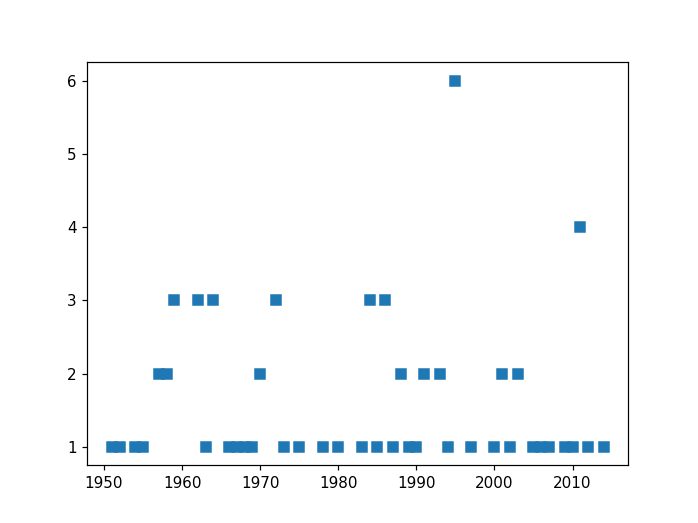

In [88]:
import matplotlib.pyplot as plt
plt.plot(df_lig_grop["language"].apply(len).index.values,
         df_lig_grop["language"].apply(len).values,
        ls="",
        marker="s")

## Juntando DataFrames
Em algumas ocasiones pode ser necessário criar um DataFrame utilizando dois ou mais DataFrame já existentes. Panda facilita realizar estas operações utilizando as funções `concat`, `merge` e `join`.

### Concat
A função [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) permite realizar a união de dois DataFrame. A união pode ser feita adicionando o DataFrame como uma série de colunas ou filas novas. Para aplicar está funções se aplica a seguinte sintaxe:

```python
pandas.concat(objs: Union[Iterable[FrameOrSeries], Mapping[Label, FrameOrSeries]], axis='0', join: str = "'outer'", ignore_index: bool = 'False', keys='None', levels='None', names='None', verify_integrity: bool = 'False', sort: bool = 'False', copy: bool = 'True')
```
Cabe destacar que esse método é próprio das `series` e `DataFrame`

In [89]:
data = np.arange(1, 10).reshape((3, 3))
columnas = [f"Col {i}" for i in range(1, 4)]
data_frame_1 = pd.DataFrame(data=data, columns=columnas)
data_frame_2 = pd.DataFrame(data=data, columns=columnas)*10
data_frame_3 = pd.DataFrame(data=data, columns=columnas)*100

In [90]:
data_frame_1

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9


In [91]:
data_frame_2

,Col 1,Col 2,Col 3
0,10,20,30
1,40,50,60
2,70,80,90


In [92]:
data_frame_3

,Col 1,Col 2,Col 3
0,100,200,300
1,400,500,600
2,700,800,900


In [93]:
# Passando os DataFrame que queremos juntar
pd.concat([data_frame_2, data_frame_3, data_frame_1])

,Col 1,Col 2,Col 3
0,10,20,30
1,40,50,60
2,70,80,90
0,100,200,300
1,400,500,600
2,700,800,900
0,1,2,3
1,4,5,6
2,7,8,9


In [94]:
# observemos que os índices foram mantidos para os DataFrame original
# Se queremos “reiniciar” os índices passamos o argumento ignore_index='False'
pd.concat([data_frame_1, data_frame_2, data_frame_3], ignore_index='False')

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9
3,10,20,30
4,40,50,60
5,70,80,90
6,100,200,300
7,400,500,600
8,700,800,900


In [95]:
# Como vimos na reunião passada podemos passar o argumento axis para definir sobre qual eixo queremos realizar a operação
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=0)

,Col 1,Col 2,Col 3
0,1,2,3
1,4,5,6
2,7,8,9
0,10,20,30
1,40,50,60
2,70,80,90
0,100,200,300
1,400,500,600
2,700,800,900


In [96]:
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=1)

,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3
0,1,2,3,10,20,30,100,200,300
1,4,5,6,40,50,60,400,500,600
2,7,8,9,70,80,90,700,800,900


In [97]:
# O que acontece quando os index dos DataFrame são diferentes?
data_frame_2.index = pd.RangeIndex(start=3, stop=6, step=1)
data_frame_3.index = pd.RangeIndex(start=6, stop=9, step=1)
pd.concat([data_frame_1, data_frame_2, data_frame_3], axis=1)

,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3,Col 1,Col 2,Col 3
0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,10.0,20.0,30.0,NaN,NaN,NaN
4,NaN,NaN,NaN,40.0,50.0,60.0,NaN,NaN,NaN
5,NaN,NaN,NaN,70.0,80.0,90.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,100.0,200.0,300.0
7,NaN,NaN,NaN,NaN,NaN,NaN,400.0,500.0,600.0
8,NaN,NaN,NaN,NaN,NaN,NaN,700.0,800.0,900.0


### merge
Pode ser necessário realizar a união de duas tabelas que compartem os elementos de uma coluna, neste caso a função `concat` não é a mais indicada. Pandas possui o método [`marge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) que realiza a junção de duas tabelas mesclando os elementos que compartilham a mesma coluna. A sintaxe para ralizar essa operação é:
```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

In [98]:
# Modificando os DataFrame
data_frame_1["coluna em comum"] = "A B C".split(" ")
data_frame_2["coluna em comum"] = "A C B".split(" ")

In [99]:
data_frame_1

,Col 1,Col 2,Col 3,coluna em comum
0,1,2,3,A
1,4,5,6,B
2,7,8,9,C


In [100]:
data_frame_2

,Col 1,Col 2,Col 3,coluna em comum
3,10,20,30,A
4,40,50,60,C
5,70,80,90,B


In [101]:
pd.merge(data_frame_1, data_frame_2, on="coluna em comum")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,Col 1_y,Col 2_y,Col 3_y
0,1,2,3,A,10,20,30
1,4,5,6,B,70,80,90
2,7,8,9,C,40,50,60


In [102]:
# Podemos passar mais de uma coluna em comum
data_frame_1["coluna em comum 2"] = "X O I".split(" ")
data_frame_2["coluna em comum 2"] = "Q I X".split(" ")

In [103]:
data_frame_1

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
0,1,2,3,A,X
1,4,5,6,B,O
2,7,8,9,C,I


In [104]:
data_frame_2

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
3,10,20,30,A,Q
4,40,50,60,C,I
5,70,80,90,B,X


In [105]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"])

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,7,8,9,C,I,40,50,60


In [106]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="left")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,1,2,3,A,X,NaN,NaN,NaN
1,4,5,6,B,O,NaN,NaN,NaN
2,7,8,9,C,I,40.0,50.0,60.0


In [107]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="right")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,NaN,NaN,NaN,A,Q,10,20,30
1,7.0,8.0,9.0,C,I,40,50,60
2,NaN,NaN,NaN,B,X,70,80,90


In [108]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="outer")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,1.0,2.0,3.0,A,X,NaN,NaN,NaN
1,4.0,5.0,6.0,B,O,NaN,NaN,NaN
2,7.0,8.0,9.0,C,I,40.0,50.0,60.0
3,NaN,NaN,NaN,A,Q,10.0,20.0,30.0
4,NaN,NaN,NaN,B,X,70.0,80.0,90.0


In [109]:
pd.merge(data_frame_1, data_frame_2, on=["coluna em comum", "coluna em comum 2"], how="inner")

,Col 1_x,Col 2_x,Col 3_x,coluna em comum,coluna em comum 2,Col 1_y,Col 2_y,Col 3_y
0,7,8,9,C,I,40,50,60


### join
Pode ser necessário combinar DataFrames que possam compartilhar os mesmos índices, neste caso as funções `concat` e `merge` não são as mais adequadas. Para resolver esses problemas os DataFrame pandas possuem o método [`join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) o qual consegue juntar DataFrame avaliando as semelhanças entre os índices. A sintaxe utilizada é:
```python
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

In [110]:
data_frame_1.index = 1, 2, 3
data_frame_2.index = 3, 1, 4

In [111]:
data_frame_1

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
1,1,2,3,A,X
2,4,5,6,B,O
3,7,8,9,C,I


In [112]:
data_frame_2

,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
3,10,20,30,A,Q
1,40,50,60,C,I
4,70,80,90,B,X


In [113]:
data_frame_1.join(data_frame_2, lsuffix=' Original')

,Col 1 Original,Col 2 Original,Col 3 Original,coluna em comum Original,coluna em comum 2 Original,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
1,1,2,3,A,X,40.0,50.0,60.0,C,I
2,4,5,6,B,O,NaN,NaN,NaN,NaN,NaN
3,7,8,9,C,I,10.0,20.0,30.0,A,Q


In [ ]:
# Neste método temos o parâmetro how que modifica a forma de ralizar a união

In [114]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="left")

,Col 1 Original,Col 2 Original,Col 3 Original,coluna em comum Original,coluna em comum 2 Original,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
1,1,2,3,A,X,40.0,50.0,60.0,C,I
2,4,5,6,B,O,NaN,NaN,NaN,NaN,NaN
3,7,8,9,C,I,10.0,20.0,30.0,A,Q


In [115]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="right")

,Col 1 Original,Col 2 Original,Col 3 Original,coluna em comum Original,coluna em comum 2 Original,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
3,7.0,8.0,9.0,C,I,10,20,30,A,Q
1,1.0,2.0,3.0,A,X,40,50,60,C,I
4,NaN,NaN,NaN,NaN,NaN,70,80,90,B,X


In [116]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="inner")

,Col 1 Original,Col 2 Original,Col 3 Original,coluna em comum Original,coluna em comum 2 Original,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
1,1,2,3,A,X,40,50,60,C,I
3,7,8,9,C,I,10,20,30,A,Q


In [117]:
data_frame_1.join(data_frame_2, lsuffix=' Original', how="outer")

,Col 1 Original,Col 2 Original,Col 3 Original,coluna em comum Original,coluna em comum 2 Original,Col 1,Col 2,Col 3,coluna em comum,coluna em comum 2
1,1.0,2.0,3.0,A,X,40.0,50.0,60.0,C,I
2,4.0,5.0,6.0,B,O,NaN,NaN,NaN,NaN,NaN
3,7.0,8.0,9.0,C,I,10.0,20.0,30.0,A,Q
4,NaN,NaN,NaN,NaN,NaN,70.0,80.0,90.0,B,X


##  Operações

### unique

O método [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) mostra os valores únicos contidos numa `Series`. Esses valores são mostrados em ordem de ocorrência. A sintaxe para utilizar este método é:

```python
pandas.unique(values)
```

In [118]:
# Forma de ser usado 1
data_frame_nan["Col_1"].unique()

array([-2, -8, -6, nan, 6, 7, -10, -7, 8], dtype=object)

In [119]:
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


In [120]:
# Forma de ser usado 2
pd.unique(data_frame_nan["Col_1"])

array([-2, -8, -6, nan, 6, 7, -10, -7, 8], dtype=object)

### nunique
O método [`nunique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) retorna o quantidades de ocorrências únicas numa `Series`. A sintaxe para utilizar esse método é:
```python
DataFrame.nunique(axis=0, dropna=True)
```

In [121]:
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


In [122]:
# Utilizando função sem passar nenhum tipo de parâmetro
data_frame_nan.nunique()
# Observemos que os valores Nan não são considerados

Col_1     8
Col_3     4
Col_4     8
Col_6     7
Col_7     8
Col_8     8
Col_9     5
Col_10    5
dtype: int64

In [123]:
# Utilizando utilizando o parâmetro dropna
data_frame_nan.nunique(dropna=False)
# Observemos que os valores Nan são considerados

Col_1     9
Col_3     5
Col_4     9
Col_6     8
Col_7     9
Col_8     8
Col_9     6
Col_10    6
dtype: int64

In [124]:
# Utilizando utilizando o parâmetro axis
data_frame_nan.nunique(axis=1, dropna=False)

Row_1     6
Row_2     5
Row_3     7
Row_4     6
Row_5     8
Row_6     8
Row_7     6
Row_8     8
Row_9     8
Row_10    6
dtype: int64

### value_counts
A função [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) retorna uma `Series` com todos os valores e o número de ocorrências de cada valor. A sintaxe para utilizar essa função é
```python
Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
```

In [125]:
#  Utilizando a função com o parâmetro sort
data_frame_nan["Col_1"].value_counts()

 8     2
-2     1
-6     1
-7     1
-8     1
 7     1
 6     1
-10    1
Name: Col_1, dtype: int64

In [126]:
# Utilizando a função com o parâmetro sort e normalize
data_frame_nan["Col_3"].value_counts(sort=True, normalize=True)

 6    0.285714
 3    0.285714
 2    0.285714
-3    0.142857
Name: Col_3, dtype: float64

In [127]:
# Utilizando a função com o parâmetro sort, normalize, dropna
data_frame_nan["Col_3"].value_counts(sort=True, normalize=True, dropna=False)

 NaN    0.3
 6.0    0.2
 3.0    0.2
 2.0    0.2
-3.0    0.1
Name: Col_3, dtype: float64

In [128]:
# Utilizando a função com argumento sort nenhum tipo de parâmetro
data_frame_nan["Col_3"].value_counts(sort=True)

 6    2
 3    2
 2    2
-3    1
Name: Col_3, dtype: int64

### del

`del` não é uma função ou método próprio de Pandas. Porém podemos usar ele para eliminar colunas de forma rápida. A sintaxe para realizar isso é:
```python
del nome_DataFrame[‘Nome_da_coluna_a_ser_eliminada’]
```

In [129]:
data_frame_nan

,Col_1,Col_3,Col_4,Col_6,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,0,-8,-8,-8,4
Row_2,-8,6,NaN,1,6,-1,-8,NaN
Row_3,-6,3,9,-6,-7,-3,7,5
Row_4,NaN,NaN,6,NaN,9,-8,4,7
Row_5,6,-3,3,2,8,-10,-8,0
Row_6,7,3,0,NaN,8,-2,9,4
Row_7,-10,2,0,-4,NaN,5,0,NaN
Row_8,-7,6,1,-5,-3,-4,-8,0
Row_9,8,2,-9,0,-10,-8,9,-6
Row_10,8,NaN,-1,6,-4,-5,NaN,NaN


In [130]:
del data_frame_nan["Col_6"]

In [131]:
data_frame_nan

,Col_1,Col_3,Col_4,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,-8,-8,-8,4
Row_2,-8,6,NaN,6,-1,-8,NaN
Row_3,-6,3,9,-7,-3,7,5
Row_4,NaN,NaN,6,9,-8,4,7
Row_5,6,-3,3,8,-10,-8,0
Row_6,7,3,0,8,-2,9,4
Row_7,-10,2,0,NaN,5,0,NaN
Row_8,-7,6,1,-3,-4,-8,0
Row_9,8,2,-9,-10,-8,9,-6
Row_10,8,NaN,-1,-4,-5,NaN,NaN


### columns
O método `columns` retorna os labels do `DataFrame`. A sintaxe para utilizar este método é:
```python
DataFrame.columns
```

In [132]:
data_frame_nan.columns

Index(['Col_1', 'Col_3', 'Col_4', 'Col_7', 'Col_8', 'Col_9', 'Col_10'], dtype='object')

### index
O método `index` retorna os índices (labels das filas) do `DataFrame`. A sintaxe para utilizar este método é:
```python
DataFrame.index
```

In [133]:
data_frame_nan.index

Index(['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5', 'Row_6', 'Row_7', 'Row_8',
       'Row_9', 'Row_10'],
      dtype='object')

### sort_values

A função [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) organiza um DataFrame por colunas ou filas. Está função permite organizar os DataFrame por varias colunas ou filas ao mesmo tempo. A sintaxe para aplicar essa função é:
```python
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
```

In [134]:
data_frame_nan

,Col_1,Col_3,Col_4,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,-8,-8,-8,4
Row_2,-8,6,NaN,6,-1,-8,NaN
Row_3,-6,3,9,-7,-3,7,5
Row_4,NaN,NaN,6,9,-8,4,7
Row_5,6,-3,3,8,-10,-8,0
Row_6,7,3,0,8,-2,9,4
Row_7,-10,2,0,NaN,5,0,NaN
Row_8,-7,6,1,-3,-4,-8,0
Row_9,8,2,-9,-10,-8,9,-6
Row_10,8,NaN,-1,-4,-5,NaN,NaN


In [135]:
# Só utilizando o parâmetro by e ordenando somente por uma coluna
data_frame_nan.sort_values(by="Col_3", ascending=False, na_position='first')

,Col_1,Col_3,Col_4,Col_7,Col_8,Col_9,Col_10
Row_1,-2,NaN,5,-8,-8,-8,4
Row_4,NaN,NaN,6,9,-8,4,7
Row_10,8,NaN,-1,-4,-5,NaN,NaN
Row_2,-8,6,NaN,6,-1,-8,NaN
Row_8,-7,6,1,-3,-4,-8,0
Row_3,-6,3,9,-7,-3,7,5
Row_6,7,3,0,8,-2,9,4
Row_7,-10,2,0,NaN,5,0,NaN
Row_9,8,2,-9,-10,-8,9,-6
Row_5,6,-3,3,8,-10,-8,0


In [136]:
# Só utilizando o parâmetro by e ordenando somente por duas colunas
data_frame_nan.sort_values(by=["Col_3", "Col_4"])

,Col_1,Col_3,Col_4,Col_7,Col_8,Col_9,Col_10
Row_5,6,-3,3,8,-10,-8,0
Row_9,8,2,-9,-10,-8,9,-6
Row_7,-10,2,0,NaN,5,0,NaN
Row_6,7,3,0,8,-2,9,4
Row_3,-6,3,9,-7,-3,7,5
Row_8,-7,6,1,-3,-4,-8,0
Row_2,-8,6,NaN,6,-1,-8,NaN
Row_10,8,NaN,-1,-4,-5,NaN,NaN
Row_1,-2,NaN,5,-8,-8,-8,4
Row_4,NaN,NaN,6,9,-8,4,7


In [137]:
# Organizando o vetor por filas
data_frame_nan.sort_values(by=["Row_2"], axis=1)

,Col_1,Col_9,Col_8,Col_3,Col_7,Col_4,Col_10
Row_1,-2,-8,-8,NaN,-8,5,4
Row_2,-8,-8,-1,6,6,NaN,NaN
Row_3,-6,7,-3,3,-7,9,5
Row_4,NaN,4,-8,NaN,9,6,7
Row_5,6,-8,-10,-3,8,3,0
Row_6,7,9,-2,3,8,0,4
Row_7,-10,0,5,2,NaN,0,NaN
Row_8,-7,-8,-4,6,-3,1,0
Row_9,8,9,-8,2,-10,-9,-6
Row_10,8,NaN,-5,NaN,-4,-1,NaN


In [138]:
# Organizando o vetor por filas
data_frame_nan.sort_values(by=["Row_2", "Row_3"], axis=1)

,Col_1,Col_9,Col_8,Col_7,Col_3,Col_10,Col_4
Row_1,-2,-8,-8,-8,NaN,4,5
Row_2,-8,-8,-1,6,6,NaN,NaN
Row_3,-6,7,-3,-7,3,5,9
Row_4,NaN,4,-8,9,NaN,7,6
Row_5,6,-8,-10,8,-3,0,3
Row_6,7,9,-2,8,3,4,0
Row_7,-10,0,5,NaN,2,NaN,0
Row_8,-7,-8,-4,-3,6,0,1
Row_9,8,9,-8,-10,2,-6,-9
Row_10,8,NaN,-5,-4,NaN,NaN,-1


### pivot

O método [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) é um dos métodos mais simples de Pandas, mas ao mesmo tempo, um dos mais usados e mais poderosos (mais um). Esse método está no mesmo nível que `groupby` e `aggregate`. Esse método se encarrega de reestruturar a um DataFrame. A sintaxe para aplicar esse método é:
```python
DataFrame.pivot(index=None, columns=None, values=None)
```


In [139]:
data_url = 'http://bit.ly/2cLzoxH'
data_frame_exemple = pd.read_csv(data_url)
data_frame_exemple

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [140]:
# Re-estruturando o dataframe
data_frame_exemple.pivot(index="country", columns="year", values="lifeExp")

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
Yemen Rep.,32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


In [141]:
# Re-estruturando o dataframe, trabalhando com dois index
data_frame_exemple.pivot(index=["country", "continent"], columns="year", values="lifeExp")

,year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,continent,,,,,,,,,,,,
Afghanistan,Asia,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,Europe,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,Africa,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,Africa,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,Americas,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,Asia,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,Asia,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
Yemen Rep.,Asia,32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


In [142]:
# Re-estruturando o dataframe, trabalhando com dois index
data_frame_exemple.pivot(index=["continent", "country"], columns="year", values=["lifeExp", "pop"])

lifeExp                                          \
year                        1952    1957    1962    1967    1972    1977   
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

                                                          ...         pop  \
year                        1982    1987    1992    1997  ...        1962   
continent country                                         ...               
Africa    Algeria         61.368  65.799  67.744  69.152  ...  11000948.0   
          Angola          39.942  39.906  40.647  40.963  ...   4826015.0   
          Benin           50.904  52.337  53.919  54.777  ...   2151895.0   
          Botswana        61.484  63.622  62.745  52.556  ...    512764.0   
          Burkina Faso    48.122  49.557  50.260  50.324  ...   4919632.0   
...                          ...     ...     ...     ...  ...         ...   
Europe    Switzerland     76.210  77.410  78.030  79.370  ...   5666000.0   
          Turkey          61.036  63.108  66.146  68.835  ...  29788695.0   
          United Kingdom  74.040  75.007  76.420  77.218  ...  53292000.0   
Oceania   Australia       74.740  76.320  77.560  78.830  ...  10794968.0   
          New Zealand     73.840  74.320  76.330  77.550  ...   2488550.0   

                                                                          \
year                            1967        1972        1977        1982   
continent country                                                          
Africa    Algeria         12760499.0  14760787.0  17152804.0  20033753.0   
          Angola           5247469.0   5894858.0   6162675.0   7016384.0   
          Benin            2427334.0   2761407.0   3168267.0   3641603.0   
          Botswana          553541.0    619351.0    781472.0    970347.0   
          Burkina Faso     5127935.0   5433886.0   5889574.0   6634596.0   
...                              ...         ...         ...         ...   
Europe    Switzerland      6063000.0   6401400.0   6316424.0   6468126.0   
          Turkey          33411317.0  37492953.0  42404033.0  47328791.0   
          United Kingdom  54959000.0  56079000.0  56179000.0  56339704.0   
Oceania   Australia       11872264.0  13177000.0  14074100.0  15184200.0   
          New Zealand      2728150.0   2929100.0   3164900.0   3210650.0   

                                                                          \
year                            1987        1992        1997        2002   
continent country                                                          
Africa    Algeria         23254956.0  26298373.0  29072015.0  31287142.0   
          Angola           7874230.0   8735988.0   9875024.0  10866106.0   
          Benin            4243788.0   4981671.0   6066080.0   7026113.0   
          Botswana         1151184.0   1342614.0   1536536.0   1630347.0   
          Burkina Faso     7586551.0   8878303.0  10352843.0  12251209.0   
...                              ...         ...         ...         ...   
Europe    Switzerland      6649942.0   6995447.0   7193761.0   7361757.0   
          Turkey          52881328.0  58179144.0  630476

### describe

A função [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) apresenta as estatísticas de um DataFrame, sendo: média, desvio padrão, quartis, etc. A sintaxe para aplicar está função é:
```python
DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
```


In [143]:
data_frame_exemple.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [144]:
data_frame_nan.describe()

,Col_1,Col_3,Col_4,Col_7,Col_8,Col_9,Col_10
count,9,7,9,9,10,9,7
unique,8,4,8,8,8,5,5
top,8,6,0,8,-8,-8,4
freq,2,2,2,2,3,4,2


### info

O método [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) apresenta um resumo do DataFrame. A sintaxe para aplicar esse método é:
```python
DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)
```

In [146]:
data_frame_exemple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [147]:
data_frame_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Row_1 to Row_10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Col_1   9 non-null      object
 1   Col_3   7 non-null      object
 2   Col_4   9 non-null      object
 3   Col_7   9 non-null      object
 4   Col_8   10 non-null     object
 5   Col_9   9 non-null      object
 6   Col_10  7 non-null      object
dtypes: object(7)
memory usage: 960.0+ bytes


## Exportando e importando dados

Uma das habilidades mais relevantes de Pandas é a forma eficiente de escrever e transformar arquivos em DataFrame. A biblioteca pandas possui mais de 15 funções que realizam a leitura de arquivos e os transformam em `pandas.DataFrame`.

---
As funções que utilizaremos para leitura de arquivos são:
- `pd.read_csv()`
- `pd.read_excel()`
- `pd.read_html()`
- `pd.to_csv()`
- `pd.to_excel()`

### read_csv

A função [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) realiza a leitura de arquivos `.csv` ou `.txt` e os transforma em DataFrame. A sintaxe para utilizar está função é:
```python
pandas.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
```
Como podemos observar esta função possui diversos parâmetros, porém o único parâmetro obrigatório é `filepath_or_buffer`, os outros parâmetros estão definidos por padrão. Mas devemos ter cuidado com o parâmetro `sep` o qual pude ser diferente ao valor padrão "`,`".

In [148]:
# Lendo um arquivo csv com separador padrão
arquivo_1 = pd.read_csv("./Dados/arquivo1.csv")
arquivo_1

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


In [149]:
# Lendo mais um arquivo csv
arquivo_2 = pd.read_csv("./Dados/arquivo2.csv", header=None)
arquivo_2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.000,0.00,0.000,0.000,0.0000,0.0000,0.00,0.00,0.0000,...,0.00,0.00,0.0000,0.000,0.000,0.00,0.00,0.0000,0.0000,0.000
1,0.0,19.500,1.02,0.391,0.202,0.0350,0.0122,0.29,4.44,9.8300,...,4.37,2.27,0.1180,0.079,3.050,7.01,9.81,0.0481,0.5550,7.390
2,1.0,19.500,1.02,0.391,0.202,0.0350,0.0122,0.29,4.44,9.8300,...,4.37,2.27,0.1180,0.079,3.050,7.01,9.81,0.0481,0.5550,7.390
3,2.0,19.500,1.02,0.391,0.202,0.0350,0.0122,0.29,4.44,9.8300,...,4.37,2.27,0.1180,0.079,3.050,7.01,9.81,0.0481,0.5550,7.390
4,3.0,19.500,1.02,0.391,0.202,0.0350,0.0122,0.29,4.44,9.8300,...,4.37,2.27,0.1180,0.079,3.050,7.01,9.81,0.0481,0.5550,7.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,8750.0,0.743,1.86,0.349,0.396,0.0391,0.0147,2.62,5.73,0.5040,...,7.60,6.26,0.0732,0.109,0.941,9.52,1.98,0.0433,0.0287,0.226
8748,8750.0,0.743,1.86,0.349,0.396,0.0391,0.0147,2.62,5.73,0.5040,...,7.60,6.26,0.0732,0.109,0.941,9.52,1.98,0.0433,0.0287,0.226
8749,8750.0,0.743,1.86,0.349,0.396,0.0391,0.0147,2.62,5.73,0.5040,...,7.60,6.26,0.0732,0.109,0.941,9.52,1.98,0.0433,0.0287,0.226
8750,8750.0,0.743,1.86,0.349,0.396,0.0391,0.0147,2.62,5.73,0.5040,...,7.60,6.26,0.0732,0.109,0.941,9.52,1.98,0.0433,0.0287,0.226


In [150]:
# Lendo mais um arquivo csv
arquivo_3 = pd.read_csv("./Dados/arquivo3.csv", sep="-")
arquivo_3

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


### read_excel
A função [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) permite a leitura de arquivos tipo excel. Vale  destacar que a as extensões permitidas são: xls, xlsx, xlsm, xlsb, odf, ods. A sintaxe para a utilizar esta função é:
```python
pandas.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skip_footer=0, skipfooter=0, convert_float=True, mangle_dupe_cols=True, **kwds)
```


In [151]:
arquivo_4 = pd.read_excel(io="./Dados/arquivo4.xlsx")
arquivo_4

,year,language
0,1951,Regional Assembly Language
1,1952,Autocode
2,1954,IPL
3,1955,FLOW MATIC
4,1957,FORTRAN
...,...,...
68,2011,Kotlin
69,2011,Red
70,2011,Elixir
71,2012,Julia


In [152]:
arquivo_5 = pd.read_excel(io="./Dados/arquivo5.xlsx")
arquivo_5

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28
0,0,19.459274,1.019596,0.391095,0.202314,0.035023,0.012180,0.290197,4.440008,9.828326,...,4.370077,2.266101,0.117615,0.078961,3.053336,7.006424,9.814404,0.048076,0.555338,7.385751
1,1,19.459274,1.019596,0.391095,0.202314,0.035023,0.012180,0.290197,4.440008,9.828326,...,4.370077,2.266101,0.117615,0.078961,3.053336,7.006424,9.814404,0.048076,0.555338,7.385751
2,2,19.459274,1.019596,0.391095,0.202314,0.035023,0.012180,0.290197,4.440008,9.828326,...,4.370077,2.266101,0.117615,0.078961,3.053336,7.006424,9.814404,0.048076,0.555338,7.385751
3,3,19.459274,1.019596,0.391095,0.202314,0.035023,0.012180,0.290197,4.440008,9.828326,...,4.370077,2.266101,0.117615,0.078961,3.053336,7.006424,9.814404,0.048076,0.555338,7.385751
4,4,19.459274,1.019596,0.391095,0.202314,0.035023,0.012180,0.290197,4.440008,9.828326,...,4.370077,2.266101,0.117615,0.078961,3.053336,7.006424,9.814404,0.048076,0.555338,7.385751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8746,8746,0.743481,1.860882,0.348647,0.396076,0.039056,0.014734,2.619609,5.732972,0.504431,...,7.599976,6.262046,0.073156,0.108892,0.941119,9.515523,1.983941,0.043303,0.028719,0.226074
8747,8747,0.743481,1.860882,0.348647,0.396076,0.039056,0.014734,2.619609,5.732972,0.504431,...,7.599976,6.262046,0.073156,0.108892,0.941119,9.515523,1.983941,0.043303,0.028719,0.226074
8748,8748,0.743481,1.860882,0.348647,0.396076,0.039056,0.014734,2.619609,5.732972,0.504431,...,7.599976,6.262046,0.073156,0.108892,0.941119,9.515523,1.983941,0.043303,0.028719,0.226074
8749,8749,0.743481,1.860882,0.348647,0.396076,0.039056,0.014734,2.619609,5.732972,0.504431,...,7.599976,6.262046,0.073156,0.108892,0.941119,9.515523,1.983941,0.043303,0.028719,0.226074


In [153]:
# E se o arquivo tem mais de uma aba?
arquivo_6 = pd.read_excel(io="./Dados/arquivo6.xlsx", sheet_name=None)
arquivo_6["A"]

,Time [h],Cell [g/L],Glucose [g/L],Xylose [g/L],Ethanol [g/L]
0,0,12.020070,12.528429,47.368901,0.605559
1,1,12.171590,12.235646,47.040265,1.174964
2,2,12.326785,11.396671,46.572356,1.905466
3,3,12.484214,9.370715,45.910947,2.826546
4,4,12.642350,5.998412,44.985505,3.962882
5,5,12.799639,2.791232,43.708940,5.327675
6,6,12.954561,1.011180,41.982199,6.915026
7,7,13.105683,0.303476,39.707409,8.693681
8,8,13.251718,0.060384,36.812688,10.605348
9,9,13.391559,0.000000,33.287267,12.570114


### read_html
A função [`read_html`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) permite realizar a leitura de uma tabela contida num site. Para utilizar está função aplicamos a seguinte sintaxe:
```python
pandas.read_html(io, match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
```

In [154]:
tabela_html_1 = pd.read_html("http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=32098&module=M")
tabela_html_1[2]

,0,1
0,Data,Taxa de cÃ¢mbio - R$ / US$ - comercial - compr...
1,1953.01,"6,6836E-15"
2,1953.02,"1,3378E-14"
3,1953.03,"1,3378E-14"
4,1953.04,"1,4884E-14"
...,...,...
810,2020.06,51960
811,2020.07,52796
812,2020.08,54606
813,2020.09,53989


In [155]:
tabela_html_2 = pd.read_html("https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/banklist.html")
tabela_html_2[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


### to_csv
A função [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) permite exportar um DataFrame para um arquivo .csv. A sintaxe para utilizar esta função e:
```python
DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict')
```

In [156]:
tabela_html_1[2].to_csv("html_to_csv.csv", sep='-')

### to_excel
A função [`to_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html) permite exportar uma DataFrame para um arquivo .xlsx. A sintaxe para utilizar esta função e:
```python
DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)
```

In [157]:
tabela_html_2[0].to_excel("html_to_excel.xlsx")